# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
import sqlite3
import requests
#cur = conn.cursor()
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from src.make_db import create_movies_db

In [13]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [80]:
conn = sqlite3.connect('data\movies.db')
movie_title = pd.read_sql ('''SELECT SUM(domestic_gross), genres
                              FROM imdb_title_basics
                              JOIN tn_movie_budgets
                              ON primary_title=movie
                              GROUP BY genres;
                              
                              ''',conn)
movie_title 
average_genres = movie_title.sort_values('genres',ascending=True)
average_genres

,SUM(domestic_gross),genres
1,0.0,Action
2,0.0,"Action,Adventure"
3,0.0,"Action,Adventure,Animation"
4,0.0,"Action,Adventure,Biography"
5,0.0,"Action,Adventure,Comedy"
...,...,...
342,0.0,Sport
343,0.0,Thriller
344,0.0,War
345,0.0,Western


In [95]:
df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
#df.domestic_gross.translate({ord('$'): None})
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [100]:
movie_title2 = pd.read_sql('''SELECT genres, domestic_gross
                              FROM imdb_title_basics
                              JOIN bom_movie_gross
                              ON primary_title=bom_movie_gross.title
                              GROUP BY genres
                              ''',conn)
movie_title2

,genres,domestic_gross
0,None,56500000.0
1,Action,1300000.0
2,"Action,Adventure",170000.0
3,"Action,Adventure,Animation",149300000.0
4,"Action,Adventure,Biography",25000000.0
...,...,...
327,Sci-Fi,96800.0
328,Sport,5300000.0
329,Thriller,17500.0
330,"Thriller,Western",21100.0


Text(0.5, 0, 'Stock')

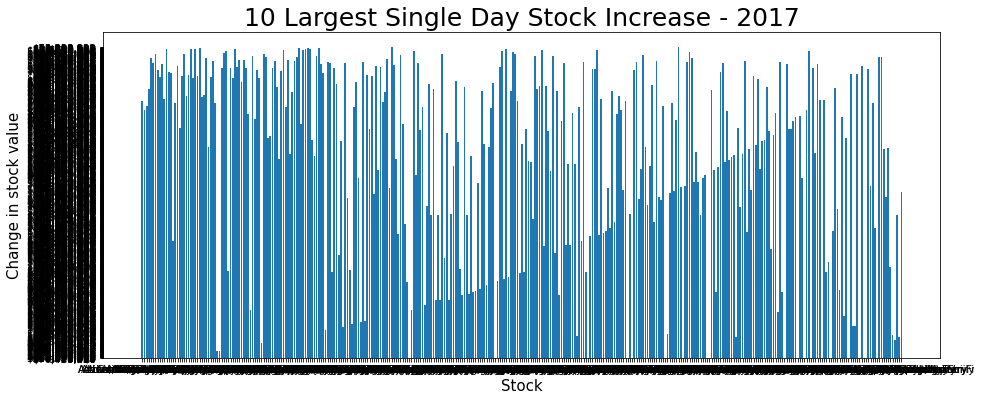

In [56]:
fig, ax = plt.subplots(figsize=(15,6))

xlabels = movie_title.genres
ax.bar(xlabels, movie_title.domestic_gross)
ax.set_title('10 Largest Single Day Stock Increase - 2017', fontsize=25)
ax.set_ylabel('Change in stock value', fontsize=15)
ax.set_xlabel('Stock', fontsize=15)
#fig.savefig('index_files/first_plot.png')

![movies.db schema](images/movies_db_schema.png)